# Training a simple linear regression using gradient descend
## (naive implementation)

### Prepared by:
- Ashish Sharma <accssharma@gmail.com>
- AI Saturdays, Boise
- AI Developers, Boise

### Necessary Imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from  mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd

### Create a simple dataset of X and y conforming a simple mathematical relationship
#### (true data: y = 1 + 2*X)

In [27]:
num_train_samples = 500
# generate a sample of input data 
X = np.linspace(1,10, 500).reshape(num_train_samples, 1)
# take a ground truth of output values using a true function 
y = 1 + 2*X

In [28]:
X.shape
X[:5,:]

array([[1.        ],
       [1.01803607],
       [1.03607214],
       [1.05410822],
       [1.07214429]])

In [29]:
y.shape
y[:5,:]

array([[3.        ],
       [3.03607214],
       [3.07214429],
       [3.10821643],
       [3.14428858]])

# Simple Linear Regression Hypothesis

Since we are working on a single variate regression problem, to focus how to use gradient descend, let us hypothesize that a simple linear equation with two parameters will approximate the true relationship between the input and output variables!

Note: Code implementations below aren't vectorized and is using inefficient `for` loops. This is, however, intended to make it easier for the absolute beginners to understand what's going on. 

In [30]:
def hypothesis(x1, theta0, theta1):
    """hypothesis of our simple linear regression"""
    h_X = theta0 + x1 * theta1
    return h_X

## Cost function - single example
- squared error

In [35]:
def cost_function(x_i, true_y, t0, t1):
    """Compute cost function of a single training example"""
    try:
        predicted_y = hypothesis(x_i, t0, t1) 
    except RuntimeError:
        print("error in cost_function")
    return np.square(predicted_y - true_y)

## Loss function (all training examples)
- mean squared error

In [36]:
def loss(theta0, theta1):
    """Compute loss for all the training examples (mean accross all examples)"""
    total_loss = []
    for ind, x_i in enumerate(X):
        y_i = y[ind] 
        cost_i = cost_function(x_i[0], y_i[0], theta0, theta1)
        total_loss.append(cost_i)
    return np.mean(np.array(total_loss))

- we know that the loss of prediction of our training data when using theta0=1 and theta1=2 must be zero, as these are the true parameters.

In [37]:
# we expect the loss to be zero
loss(1,2)

0.0

## Gradient Descend

### Compute Gradients (mathematically, compute partial derivates)

- Lets compute the partial derivative of the loss function w.r.t the two parameters and compute the average of gradients accross all the training dataset

In [38]:
def gradients(theta0, theta1):
    """Compute gradients of the loss function.
    
    Averaged on all the training examples.
    """
    grad0 = []
    grad1 = []
    for ind, x_i in enumerate(X):
        diff_i_0 = theta0 + theta1 * x_i[0] - y[ind][0]
        diff_i_1 = (theta0 + theta1 * x_i[0] - y[ind][0]) * x_i[0]
        grad0.append(diff_i_0)
        grad1.append(diff_i_1)
    return 2*np.mean(np.array(grad0)), 2*np.mean(np.array(grad1))

### Iterative run a gradient descend algorithm to get the optimal values of the parameters
- Iteratively, let's update our parameters based on the gardients

In [39]:
def train(lr=0.01, num_iter=100, t0_est = 0.5, t1_est = 0.5):
    t0_values = []
    t1_values = []
    loss_values = []
    t0_values.append(t0_est)
    t1_values.append(t1_est)
    lss = loss(t0_est, t1_est)
    loss_values.append(lss)
    
    # iterate and update parameters based on the gradients
    for i in range(num_iter):
        grad0, grad1 = gradients(t0_est, t1_est)
        # print (grad0, grad1)
        t0_est = t0_est - grad0 * lr
        t1_est = t1_est - grad1 * lr
        t0_values.append(t0_est)
        t1_values.append(t1_est)
        lss = loss(t0_est, t1_est)
        loss_values.append(lss)
    
    return np.array(t0_values), np.array(t1_values), np.array(loss_values)

Here, play around with num_iter and learning rate to see their effect in the training process (try lr=0.005, num_iter=4000). The process to come up with the best values of number of iteration, learning rate to obtain the most optimal values of the model parameters theta0, theta1 is known as `hyper-parameter optimization` or `hyper-parameter tuning`. Here, theta0 and theta1 are the model PARAMETERS, whereas, the factors like number of iterations, learning rate, etc are known as HYPER-PARAMETERS. 


In [40]:
xx, yy, lss_vals = train(num_iter=4000, lr=0.005)
# let's get the most recently updated values of theta0 and theta1 (optimal values)
final_theta_0 = xx[-1]
final_theta_1 = yy[-1]
final_theta_0, final_theta_1

(0.999791966726549, 2.0000310514323862)

- Notice that, as you increase the number of iterations with apropriate learning rate, we get more accurate estimation of our parameters

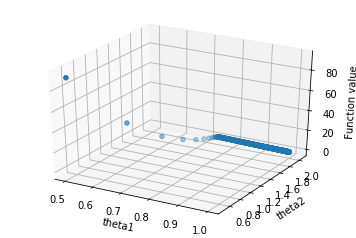

In [41]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(xx, yy, lss_vals)
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')
ax.set_zlabel('Function value')
plt.show()

# Prediction
Now that we have obtained the optimal values of our model parameters, we can use these parameters to make predictions on the unseen values of X (whose y values are unknown).

In [42]:
def predict(x_pred):
    predicted_y = hypothesis(x_pred, final_theta_0, final_theta_1)
    return predicted_y

In [43]:
# for an input x=1, we expect the output to be 3
predict(1)

2.9998230181589354

Thank you!